In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import acquire
import prepare
from env import get_db_url
import time
import warnings
warnings.filterwarnings("ignore")
import explore

In [123]:
df = prepare.prepare_logs()
df3 = explore.explore_question3(df)

In [3]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647197 entries, 4 to 900217
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   path            647197 non-null  object        
 1   user_id         647197 non-null  object        
 2   ip              647197 non-null  object        
 3   cohort          647197 non-null  object        
 4   start_date      647197 non-null  datetime64[ns]
 5   end_date        647197 non-null  datetime64[ns]
 6   created_at      647197 non-null  datetime64[ns]
 7   updated_at      647197 non-null  datetime64[ns]
 8   program         647197 non-null  object        
 9   date_time       647197 non-null  datetime64[ns]
 10  program_access  647197 non-null  bool          
dtypes: bool(1), datetime64[ns](5), object(5)
memory usage: 54.9+ MB


In [4]:
df3.user_id.groupby(df3.cohort).nunique()

cohort
andromeda     27
apex          21
bash          22
bayes         22
betelgeuse    20
ceres         29
curie         19
darden        28
deimos        25
easley        17
europa        28
florence      21
fortuna       28
ganymede      28
hyperion      23
jupiter       33
kalypso       23
luna          20
marco         31
neptune       37
oberon        26
sequoia       21
teddy         31
ulysses       28
voyageurs     33
wrangell      26
xanadu        20
yosemite      27
zion          25
Name: user_id, dtype: int64

In [6]:
df3.cohort.nunique()

29

In [124]:
df3['cohort_program'] = df3['program'] + '_' + df3['cohort']

In [125]:
df3.drop(df3[df3.cohort.isin(['easley', 'florence', 'neptune',  'sequoia', 'oberon', 'luna', 'marco'])].index, inplace=True)

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579774 entries, 4 to 900201
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   path            579774 non-null  object        
 1   user_id         579774 non-null  object        
 2   ip              579774 non-null  object        
 3   cohort          579774 non-null  object        
 4   start_date      579774 non-null  datetime64[ns]
 5   end_date        579774 non-null  datetime64[ns]
 6   created_at      579774 non-null  datetime64[ns]
 7   updated_at      579774 non-null  datetime64[ns]
 8   program         579774 non-null  object        
 9   date_time       579774 non-null  datetime64[ns]
 10  program_access  579774 non-null  bool          
 11  cohort_program  579774 non-null  object        
dtypes: bool(1), datetime64[ns](5), object(6)
memory usage: 53.6+ MB


<AxesSubplot:>

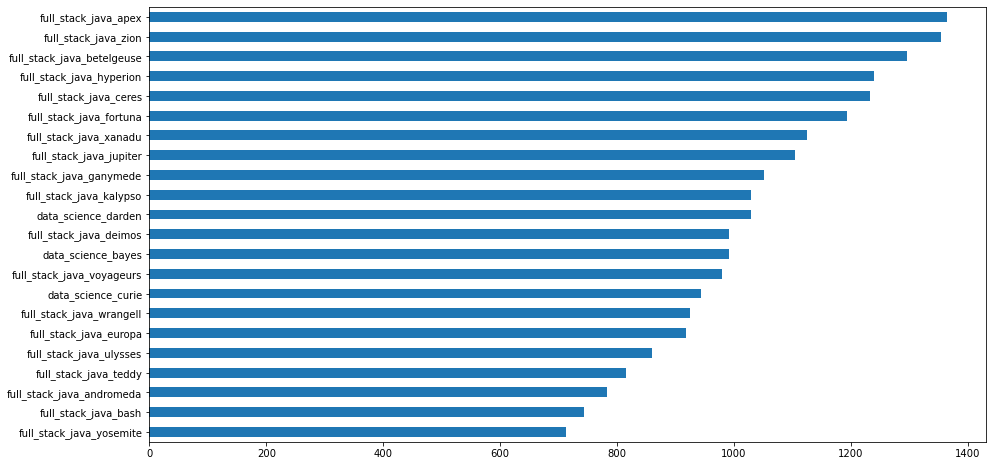

In [120]:
plt.figure(figsize=(15,8))
(df3.cohort_program.value_counts()/df3.user_id.groupby(df3.cohort_program).nunique()).sort_values(ascending=True).plot(kind='barh')

In [23]:
df3.user_id.value_counts().quantile(.75)

1377.75

In [126]:
df3['date_time_copy'] = df3['date_time']

In [127]:
df3 = df3.set_index('date_time_copy').sort_index()

In [128]:
df3['weekday_name'] = df3.index.day_name()
df3['hour'] = df3.index.time
df3['hour'] = df3['hour'].astype(str)
df3['hour'] = df3['hour'].str[:-6]

In [129]:
counts = df3.user_id.value_counts()
bottom_5 = df3[df3['user_id'].isin(counts[counts < 113].index)]
bottom_25 = df3[df3['user_id'].isin(counts[counts < 605].index)]
middle = df3[df3['user_id'].isin(counts[counts < 1377].index)]
middle = df3[df3['user_id'].isin(counts[counts >= 605].index)]
top_95 = df3[df3['user_id'].isin(counts[counts >= 113].index)]
top_25 = df3[df3['user_id'].isin(counts[counts >= 1377].index)]

In [104]:
# of users, how many last day is over 30 days from program end date, what percentage

In [130]:
bottom_5_users = bottom_5.groupby(bottom_5.user_id).max()
bottom_5_users['last_day'] = bottom_5_users['end_date'] - bottom_5_users['date_time']
bottom_5_users['last_day'] = bottom_5_users['last_day'].astype(str)
bottom_5_users['last_day'] = bottom_5_users['last_day'].str[:-14]
bottom_5_users['last_day'] = bottom_5_users['last_day'].astype(int)
len(bottom_5_users['last_day']), (bottom_5_users['last_day'] > 30).sum(), (bottom_5_users['last_day'] > 30).sum()/len(bottom_5_users['last_day'])

(29, 19, 0.6551724137931034)

In [131]:
top_95_users = top_95.groupby(top_95.user_id).max()
top_95_users['last_day'] = top_95_users['end_date'] - top_95_users['date_time']
top_95_users['last_day'] = top_95_users['last_day'].astype(str)
top_95_users['last_day'] = top_95_users['last_day'].str[:-14]
top_95_users['last_day'] = top_95_users['last_day'].astype(int)
len(top_95_users['last_day']), (top_95_users['last_day'] > 30).sum(), (top_95_users['last_day'] > 30).sum()/len(top_95_users['last_day'])

(533, 88, 0.1651031894934334)

In [132]:
bottom_25_users = bottom_25.groupby(bottom_25.user_id).max()
bottom_25_users['last_day'] = bottom_25_users['end_date'] - bottom_25_users['date_time']
bottom_25_users['last_day'] = bottom_25_users['last_day'].astype(str)
bottom_25_users['last_day'] = bottom_25_users['last_day'].str[:-14]
bottom_25_users['last_day'] = bottom_25_users['last_day'].astype(int)
len(bottom_25_users['last_day']), (bottom_25_users['last_day'] > 30).sum(), (bottom_25_users['last_day'] > 30).sum()/len(bottom_25_users['last_day'])

(141, 69, 0.48936170212765956)

In [255]:
top_25_users = top_25.groupby(top_25.user_id).max()
top_25_users['last_day'] = top_25_users['end_date'] - top_25_users['date_time']
top_25_users['last_day'] = top_25_users['last_day'].astype(str)
top_25_users['last_day'] = top_25_users['last_day'].str[:-14]
top_25_users['last_day'] = top_25_users['last_day'].astype(int)
len(top_25_users['last_day']), (top_25_users['last_day'] > 30).sum(), (top_25_users['last_day'] > 30).sum()/len(top_25_users['last_day'])

(141, 9, 0.06382978723404255)

In [256]:
middle_users = middle.groupby(middle.user_id).max()
middle_users['last_day'] = middle_users['end_date'] - middle_users['date_time']
middle_users['last_day'] = middle_users['last_day'].astype(str)
middle_users['last_day'] = middle_users['last_day'].str[:-14]
middle_users['last_day'] = middle_users['last_day'].astype(int)
len(middle_users['last_day']), (middle_users['last_day'] > 30).sum(), (middle_users['last_day'] > 30).sum()/len(top_25_users['last_day'])

(421, 38, 0.2695035460992908)

In [365]:
all_users = df3.groupby(df3.user_id).max()
all_users['last_day'] = all_users['end_date'] - all_users['date_time']
all_users['last_day'] = all_users['last_day'].astype(str)
all_users['last_day'] = all_users['last_day'].str[:-14]
all_users['last_day'] = all_users['last_day'].astype(int)
len(all_users['last_day']), (all_users['last_day'] > 30).sum(), (all_users['last_day'] > 30).sum()/len(all_users['last_day'])

(562, 107, 0.1903914590747331)

In [134]:
bottom_25

,path,user_id,ip,cohort,start_date,end_date,created_at,updated_at,program,date_time,program_access,cohort_program,weekday_name,hour
date_time_copy,,,,,,,,,,,,,,
2018-01-26 10:02:21,javascript-i/functions,8,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 10:02:21,True,full_stack_java_teddy,Friday,10
2018-01-26 10:02:42,javascript-i/functions,9,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 10:02:42,True,full_stack_java_teddy,Friday,10
2018-01-26 10:33:25,javascript-i/functions,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 10:33:25,True,full_stack_java_teddy,Friday,10
2018-01-26 10:35:08,javascript-i/introduction/working-with-data-ty...,14,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 10:35:08,True,full_stack_java_teddy,Friday,10
2018-01-26 10:35:12,javascript-i/javascript-with-html,14,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 10:35:12,True,full_stack_java_teddy,Friday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12 14:33:30,web-design,798,107.138.213.232,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-04-12 14:33:30,True,full_stack_java_kalypso,Monday,14
2021-04-12 14:33:37,web-design/intro,798,107.138.213.232,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-04-12 14:33:37,True,full_stack_java_kalypso,Monday,14
2021-04-12 14:34:40,web-design/ui/typography,798,107.138.213.232,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-04-12 14:34:40,True,full_stack_java_kalypso,Monday,14


In [151]:
name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for x in name:
    (top_25.weekday_name == x).sum()/len(top_25)
    

In [182]:
(top_25.weekday_name == 'Monday').sum()/top_25.user_id.nunique()

366.0425531914894

In [186]:
top_25.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261688 entries, 2018-01-26 09:56:24 to 2021-04-21 16:32:36
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   path            261688 non-null  object        
 1   user_id         261688 non-null  object        
 2   ip              261688 non-null  object        
 3   cohort          261688 non-null  object        
 4   start_date      261688 non-null  datetime64[ns]
 5   end_date        261688 non-null  datetime64[ns]
 6   created_at      261688 non-null  datetime64[ns]
 7   updated_at      261688 non-null  datetime64[ns]
 8   program         261688 non-null  object        
 9   date_time       261688 non-null  datetime64[ns]
 10  program_access  261688 non-null  bool          
 11  cohort_program  261688 non-null  object        
 12  weekday_name    261688 non-null  object        
 13  hour            261688 non-null  object        
dtypes:

In [193]:
top_25.user_id.nunique()

141

In [ ]:
top_25['weekday_name'].value_counts()

In [199]:
top_25['weekday_name'].value_counts() /  top_25.user_id.nunique()

Monday       366.042553
Tuesday      363.687943
Thursday     328.836879
Wednesday    316.723404
Friday       277.964539
Sunday       120.163121
Saturday      82.524823
Name: weekday_name, dtype: float64

In [202]:
bottom_25.user_id.nunique()

141

In [201]:
bottom_25['weekday_name'].value_counts() / bottom_25.user_id.nunique()

Monday       74.085106
Tuesday      68.957447
Thursday     60.602837
Wednesday    56.702128
Friday       52.219858
Sunday       10.992908
Saturday      8.304965
Name: weekday_name, dtype: float64

<AxesSubplot:xlabel='weekday_name', ylabel='count'>

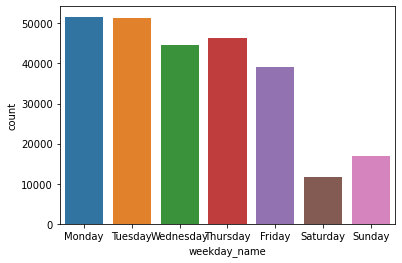

In [137]:
order=(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.countplot(data=top_25, x='weekday_name', order=order)

In [178]:
bottom_25

,path,user_id,ip,cohort,start_date,end_date,created_at,updated_at,program,date_time,program_access,cohort_program,weekday_name,hour
date_time_copy,,,,,,,,,,,,,,
2018-01-26 10:02:21,javascript-i/functions,8,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 10:02:21,True,full_stack_java_teddy,Friday,10
2018-01-26 10:02:42,javascript-i/functions,9,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 10:02:42,True,full_stack_java_teddy,Friday,10
2018-01-26 10:33:25,javascript-i/functions,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 10:33:25,True,full_stack_java_teddy,Friday,10
2018-01-26 10:35:08,javascript-i/introduction/working-with-data-ty...,14,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 10:35:08,True,full_stack_java_teddy,Friday,10
2018-01-26 10:35:12,javascript-i/javascript-with-html,14,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 10:35:12,True,full_stack_java_teddy,Friday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12 14:33:30,web-design,798,107.138.213.232,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-04-12 14:33:30,True,full_stack_java_kalypso,Monday,14
2021-04-12 14:33:37,web-design/intro,798,107.138.213.232,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-04-12 14:33:37,True,full_stack_java_kalypso,Monday,14
2021-04-12 14:34:40,web-design/ui/typography,798,107.138.213.232,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-04-12 14:34:40,True,full_stack_java_kalypso,Monday,14


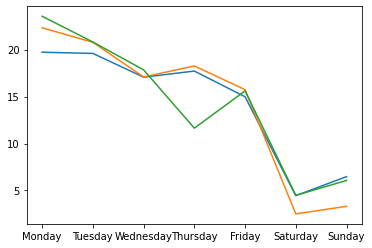

In [171]:
order=(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
x = [top_25, bottom_25]
ax = (top_25.weekday_name.value_counts(normalize=True, sort=False)*100).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot()
(bottom_25.weekday_name.value_counts(normalize=True, sort=False)*100).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(ax=ax)
(bottom_5.weekday_name.value_counts(normalize=True, sort=False)*100).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(ax=ax)

plt.show()


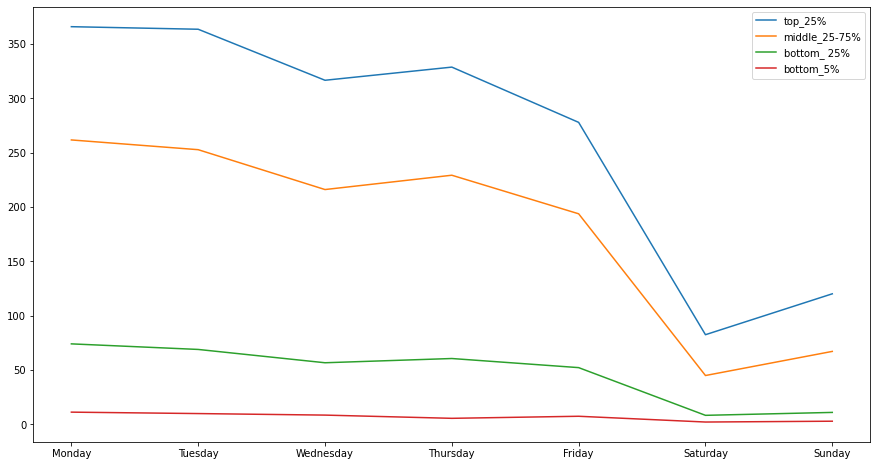

In [214]:
plt.figure(figsize=(15,8))
ax = (top_25['weekday_name'].value_counts() / top_25.user_id.nunique()).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(label= "top_25%")
(middle['weekday_name'].value_counts() / middle.user_id.nunique()).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(ax=ax, label="middle_25-75%")
(bottom_25['weekday_name'].value_counts() / bottom_25.user_id.nunique()).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(ax=ax, label="bottom_ 25%")
(bottom_5['weekday_name'].value_counts() / bottom_5.user_id.nunique()).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(ax=ax, label="bottom_5%")
plt.legend()
plt.show()

Note, this does not represent access numbers, but rather what percentage of access in said population is on which day. This can tell help us compare the trend of access across populations. We are not looking at counts, but rather the change (slope) from one point to the next.

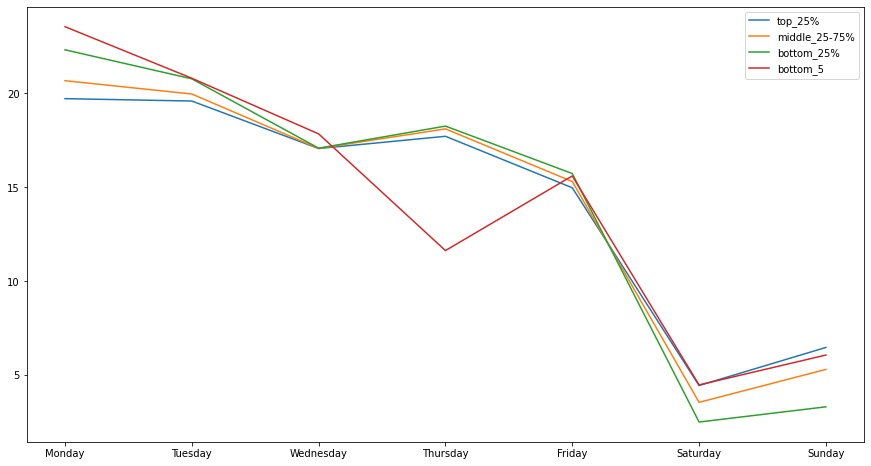

In [240]:
plt.figure(figsize=(15,8))
order=(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax = (top_25.weekday_name.value_counts(normalize=True, sort=False)*100).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(label= "top_25%")
(middle.weekday_name.value_counts(normalize=True, sort=False)*100).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(ax=ax,label= 'middle_25-75%')
(bottom_25.weekday_name.value_counts(normalize=True, sort=False)*100).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(ax=ax, label= "bottom_25%")
(bottom_5.weekday_name.value_counts(normalize=True, sort=False)*100).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(ax=ax,label= 'bottom_5')
plt.legend()
plt.show()

Takeaways - The top and middle accessors have slightly less margin of difference in weekday access compared to the margin of difference for bottom accessers. There is a noteable drop off of bottom 5% accessors on Thursdays

In [228]:
middle['hour'].value_counts()

09    84176
11    54742
10    53023
14    51088
15    48062
13    45339
16    37663
08    30396
12    28471
21    13898
20    13431
17    12769
19    11855
22    11588
18    11048
23     7560
07     6785
00     3546
06     2749
01     1715
05     1064
02      956
04      586
03      471
Name: hour, dtype: int64

In [ ]:
(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

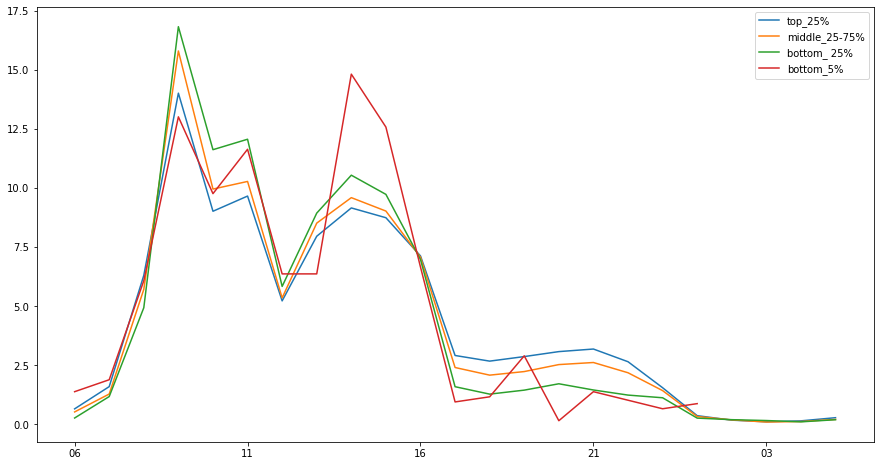

In [241]:
plt.figure(figsize=(15,8))
ax = (top_25['hour'].value_counts(normalize=True, sort=False)*100).reindex(['06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '01', '02', '03', '04', '05']).plot(label= "top_25%")
(middle['hour'].value_counts(normalize=True, sort=False)*100).reindex(['06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '01', '02', '03', '04', '05']).plot(ax=ax, label="middle_25-75%")
(bottom_25['hour'].value_counts(normalize=True, sort=False)*100).reindex(['06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '01', '02', '03', '04', '05']).plot(ax=ax, label="bottom_ 25%")
(bottom_5['hour'].value_counts(normalize=True, sort=False)*100).reindex(['06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '01', '02', '03', '04', '05']).plot(ax=ax, label="bottom_5%")
plt.legend()
plt.show()

In [249]:
middle_users.end_date_diff.mean(), top_25_users.end_date_diff.mean(), 

(86.04942638534958, 85.42830308422013)

<AxesSubplot:xlabel='weekday_name', ylabel='count'>

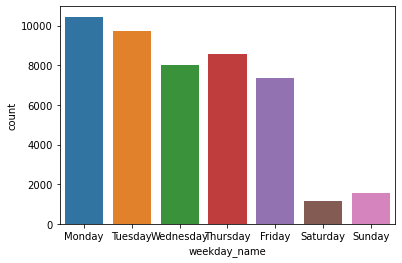

In [157]:
order=(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.countplot(data=bottom_25, x='weekday_name', order=order)

In [251]:
bottom_25_users

,path,ip,cohort,start_date,end_date,created_at,updated_at,program,date_time,program_access,cohort_program,weekday_name,hour,last_day
user_id,,,,,,,,,,,,,,
8,slides/syntax_types_and_variables,97.77.127.220,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-03-14 15:46:06,True,full_stack_java_teddy,Wednesday,22,63
9,spring/setup,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-05-11 11:28:51,True,full_stack_java_teddy,Wednesday,20,5
13,javascript-ii,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-05-02 17:15:29,True,full_stack_java_teddy,Wednesday,17,14
14,spring/setup,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-05-03 13:38:26,True,full_stack_java_teddy,Wednesday,20,13
20,spring/setup,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-05-15 15:10:05,True,full_stack_java_teddy,Wednesday,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,toc,72.182.64.120,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2020-12-11 20:15:26,True,full_stack_java_kalypso,Wednesday,21,143
812,html-css/forms,24.243.49.105,hyperion,2020-05-26,2020-11-10,2020-05-26 19:22:44,2020-05-26 19:22:44,full_stack_java,2020-11-08 01:46:07,True,full_stack_java_hyperion,Sunday,01,1
832,javascript-i,69.154.52.98,jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,full_stack_java,2020-12-07 14:22:39,True,full_stack_java_jupiter,Monday,14,112


In [271]:
len(bottom_5_users)

29

<AxesSubplot:xlabel='last_day', ylabel='Count'>

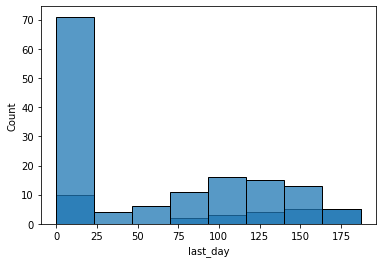

In [294]:
sns.histplot(data= bottom_5_users, x='last_day', bins=8)

<AxesSubplot:xlabel='last_day', ylabel='Count'>

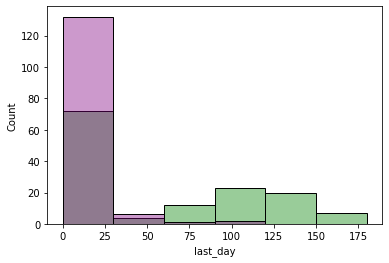

In [325]:
sns.histplot(data= bottom_25_users, x='last_day', bins=[0,30,60,90,120,150, 180], color='green', alpha=.4)
sns.histplot(data= top_25_users, x='last_day', bins=[0,30,60,90,120,150, 180], color='purple', alpha=.4)


<AxesSubplot:xlabel='last_day'>

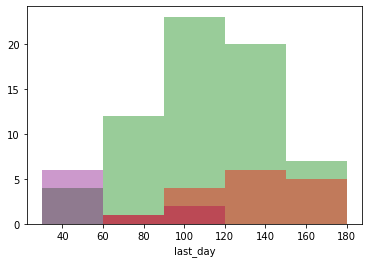

In [332]:
sns.distplot(bottom_25_users.last_day, bins=[30,60,90,120,150, 180], color='green', kde=False)
sns.distplot(top_25_users.last_day, bins=[30,60,90,120,150, 180], color='purple', kde=False)
sns.distplot(bottom_5_users.last_day, bins=[30,60,90,120,150, 180], color='red', kde=False)

In [ ]:
sns.histplot(data= bottom_25_users, x='last_day', bins=[0,30,60,90,120,150, 180], color='green', alpha=.4)
sns.histplot(data= top_25_users, x='last_day', bins=[0,30,60,90,120,150, 180], color='purple', alpha=.4)

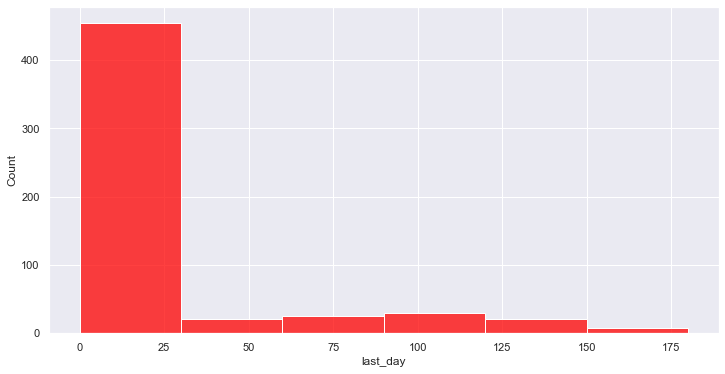

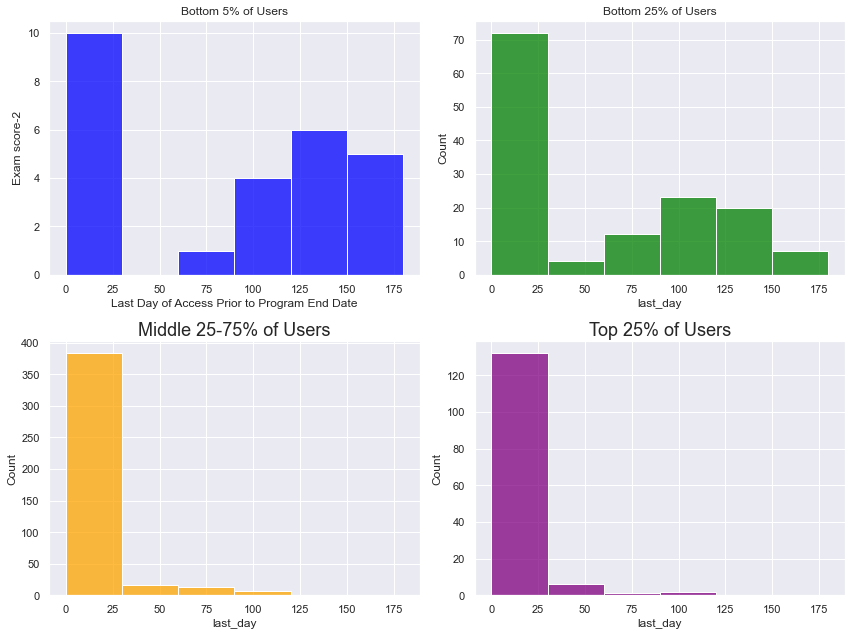

In [444]:
plt.figure(figsize=(12,6))

sns.histplot(data= all_users, x='last_day', bins=[0,30,60,90,120,150, 180], color='red')

fig, axes = plt.subplots(2, 2, figsize=(12,9))

sns.histplot(data= bottom_5_users, x='last_day', bins=[0,30,60,90,120,150, 180], color='blue', ax=axes[0,0]).set(title = 'Bottom 5% of Users', xlabel="Last Day of Access Prior to Program End Date", ylabel="Exam score-2")

sns.histplot(data= bottom_25_users, x='last_day', bins=[0,30,60,90,120,150, 180], color='green', ax=axes[0,1]).set_title('Bottom 25% of Users')

sns.histplot(data= middle_users, x='last_day', bins=[0,30,60,90,120,150, 180], color='orange', ax=axes[1,0]).set_title('Middle 25-75% of Users', size= 18)

sns.histplot(data= top_25_users, x='last_day', bins=[0,30,60,90,120,150, 180], color='purple', ax=axes[1,1]).set_title('Top 25% of Users', size=18)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.tight_layout()

plt.show()


<AxesSubplot:xlabel='last_day', ylabel='Count'>

<Figure size 432x288 with 0 Axes>

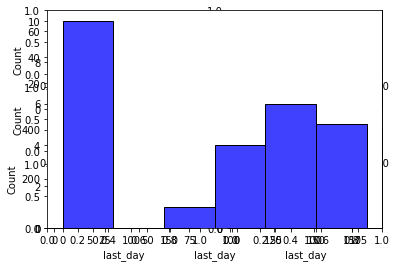

In [358]:
fig = plt.figure()

fig, axes = plt.subplots(3, 2)

sns.histplot(data= bottom_25_users, x='last_day', bins=[0,30,60,90,120,150, 180], color='green', ax=ax)

ax = fig.add_subplot(222)
sns.histplot(data= top_25_users, x='last_day', bins=[0,30,60,90,120,150, 180], color='purple', ax=ax)

ax = fig.add_subplot(223)
sns.histplot(data= middle_users, x='last_day', bins=[0,30,60,90,120,150, 180], color='orange', ax=ax)

ax = fig.add_subplot(224)
sns.histplot(data= bottom_5_users, x='last_day', bins=[0,30,60,90,120,150, 180], color='blue', ax=ax)

ax = fig.add_subplot()
sns.histplot(data= bottom_5_users, x='last_day', bins=[0,30,60,90,120,150, 180], color='blue', ax=ax)



<AxesSubplot:xlabel='last_day', ylabel='Count'>

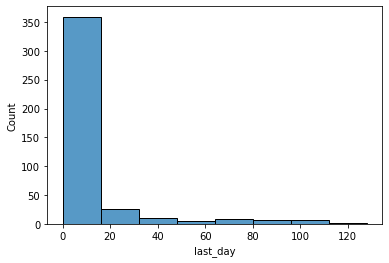

In [269]:
sns.histplot(data= middle_users, x='last_day', bins=8)

<AxesSubplot:xlabel='last_day', ylabel='Count'>

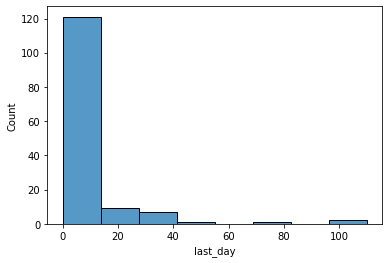

In [270]:
sns.histplot(data= top_25_users, x='last_day', bins=8)

In [293]:
(bottom_5_users.last_day > 30).sum() /len(bottom_5_users), (bottom_5_users.last_day > 60).sum() /len(bottom_5_users), (bottom_5_users.last_day > 90).sum() /len(bottom_5_users)

(0.6551724137931034, 0.6551724137931034, 0.6206896551724138)

In [289]:
(bottom_25_users.last_day > 30).sum() /len(bottom_25_users), (bottom_25_users.last_day > 60).sum() /len(bottom_25_users), (bottom_25_users.last_day > 90).sum() /len(bottom_25_users)

(0.48936170212765956, 0.46099290780141844, 0.36879432624113473)

In [291]:
(middle_users.last_day > 30).sum() /len(middle_users), (middle_users.last_day > 60).sum() /len(middle_users), (middle_users.last_day > 90).sum() /len(middle_users)

(0.09026128266033254, 0.0498812351543943, 0.019002375296912115)

In [292]:
(top_25_users.last_day > 30).sum() /len(top_25_users), (top_25_users.last_day > 60).sum() /len(top_25_users), (top_25_users.last_day > 90).sum() /len(top_25_users)

(0.06382978723404255, 0.02127659574468085, 0.014184397163120567)

Biggest takeaway for Q3- 

- for the very low accessors (bottom 5%), over 60% last day of access was greater than 90 days out from the program end date

- bottom 25% has 37% with last access date over 90 days from graduation and an additional 12% (49% of this population) did no access in the last 30 days of the program

- this is compared to the top 75% of accessors had 9% last access day being greater than 30 days and only 2% last day of access is greater than 90 days from grad date

- month, time of day of access, cohort, and program did not show a consisten trend for low access